In [2]:
import json
import pandas as pd
import numpy as np
#OPENING YELP REVIEWS DATASETS
#read the data from disk and split into lines
#we use .strip() to remove the final (empty) line
with open("yelp_academic_dataset_review.json") as f:
    reviews = f.read().strip().split("\n")
 
#each line of the file is a separate JSON object
reviews = [json.loads(review) for review in reviews] 
print(reviews[2])

{'review_id': 'wslW2Lu4NYylb1jEapAGsw', 'user_id': 'r1NUhdNmL6yU9Bn-Yx6FTw', 'business_id': '2aFiy99vNLklCx3T_tGS9A', 'stars': 5, 'date': '2011-04-29', 'text': 'Great service! Corey is very service oriented. Works fast and very effiecient with his time. Going to use him again real soon to do additional IT services. thanks Corey.', 'useful': 0, 'funny': 0, 'cool': 0, 'type': 'review'}


In [4]:
###### extract random sample data
import random
random.seed(17)
sample = random.sample(reviews, 20000)

In [8]:
sample_reviews = pd.DataFrame(sample)

In [9]:
sample_reviews['labels'] = ['positive' if sample_reviews.loc[i,'stars']>= 4 else 'negative' for i in range(len(sample_reviews))]

In [11]:
sample

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,type,labels
0,icFXTyerW1X8p7oSOF0Vog,ojp5d9vW8dQpU12Mv6vthQ,prjaJmqTAnYdeLrWp8_MlA,1,2014-05-22,As bad as a dry cleaning experience could be. ...,4,0,0,review,negative
1,arefzeNBacurVt-gqI9J-g,oQ7irCudwDr73-938pXQIg,UV2Jt8slktGu14gLZeNCjA,5,2012-02-18,This restaurant is a gem. The daily brunch is ...,0,0,0,review,positive
2,a-sids8zheK3JBC9DnnR5g,cp0zNS_4chviJdhrSbEdqA,MYn-VzURyyDQqz0l5-PmDQ,5,2016-07-24,I really like the owners!!! I 'used' to like a...,2,1,2,review,positive
3,fVnQtiHIsFHFgaLJT8ULvQ,7hnwrH20r6IiJOAlNOPgcw,bMrYaaAy62ppdS09na0RgQ,5,2016-07-07,"Love this place. Pizzas are great, the staff i...",0,0,0,review,positive
4,SW65Xgk6A6OpkDE5hCPOHw,ogGW1hddNjqY3LrldLBr4g,vcxvQyAggPqxcHwvJXvjGg,4,2012-04-30,Finally made it out here with a heads up from ...,1,1,1,review,positive
...,...,...,...,...,...,...,...,...,...,...,...
19995,BvimY0vSBc2ODupYd1Uu6A,QJMOgjRYeogK43kyfX6PKw,eTZTX_tMvYv974oS0P0XOA,4,2013-06-30,Yelp 100 Challenge * 79/100\n\nArmed with the ...,2,0,2,review,positive
19996,m5vWZYgHKPo3KBRs65aNfA,ACwBMSJzgW6vOvV7vOrk8Q,Iaj67sDwd3qD-bQkG46H6Q,4,2017-01-01,I know this is an offshoot of Nordstrom but it...,5,5,6,review,positive
19997,S4yjoPNzskvMQxnETLq_zg,ZAu3W2-OWhp1F51AXNcOOg,NvKNe9DnQavC9GstglcBJQ,5,2013-05-23,The shrimp scampi is divine and its worth all ...,1,1,1,review,positive
19998,WaHMDmE0C7jgbsMIDgbhDQ,X-VOe5bzT9EJu_L_Bt0nLQ,4POPYEONJpkfhWOMx_PyGg,5,2016-03-14,I came to Harbour Sixty last week and the food...,0,0,0,review,positive


In [35]:
from sklearn.model_selection import train_test_split
np.random.seed(17)
train_reviews, test_reviews = train_test_split(sample_reviews, test_size=0.2)

In [36]:
test_reviews

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,type,labels
2953,Tsd9XyFIwSd1Lxm1x-JWYQ,KatSA3PejdQkhCf0ZHUqHQ,SXnXItivyE3i3FQbydak-A,4,2009-08-05,Harbord Fish and Chips is a small brick hut th...,4,1,1,review,positive
12758,2Ztk50mH8OBluRKjhC69WQ,mpDGDd3sEwZ3o5xH0ovQcQ,hpnFcRFzs3kg-qM1tPEg3g,1,2012-04-23,Let's just preface this review by saying that ...,17,11,3,review,negative
11794,WASM0Eq0bKootfec_6h0kQ,z7GkXK4o0dOxjDzh3AWgHg,-050d_XIor1NpCuWkbIVaQ,2,2011-07-11,"First off, lemme just say that this review ref...",2,0,0,review,negative
16721,gMhrZVWenB9f4i9jhWI-Bg,cQUF5qObYocP-RcUNZQ4iQ,dn51F67VLgPuqy_8SFk9oA,3,2016-05-05,"It's an old casino, took a long time to get ou...",0,0,0,review,negative
1276,tzTbQN7I2KecWc9YBOC0Xw,JRPARbQMFittIk3XOxO8JQ,q6BiPGNf2ANWkwal9HPkQg,3,2011-03-27,"My first grand visit was last night, pulled in...",1,0,0,review,negative
...,...,...,...,...,...,...,...,...,...,...,...
2944,zH8fivQtIuqLlCPdzyukTA,yKF3gzA8MxJO54RA-S2Uxg,KwMe8zC9UoMXqxKcPYm5xw,2,2011-11-21,You can only hope the song and dance about the...,0,1,0,review,negative
18045,ZkdZGAg-b1tmE4FK-1TnOg,jlpapIPWURjBUg3V31AjKw,KFAJsmQ6GnHxyfmv16s9VA,3,2010-02-13,I have to say that this place is a novelty. I...,1,0,1,review,negative
18679,0vrabhdIuNrOGryd8aLHxA,wDSikRnTsC4LWWV86ls0HQ,n-AQFKbW6MnpamdtA6ECpQ,1,2015-08-06,One word- GROSS! Okay two words - FILTHY. I ha...,2,0,0,review,negative
8796,PBry3tvMuJcrCcZkdvxUJA,pm2Xtpl0zwp94Yaj5cT26g,3wQTAiBRDfycDz0MEIw1dQ,5,2012-07-06,If I were giving stars out based on the compan...,2,0,0,review,positive


In [37]:
### train extract
train_labels = []
train_corpus = []
for i in range(len(train_reviews)):
    train_labels.append(train_reviews.iloc[i]['labels'])
    train_corpus.append(train_reviews.iloc[i]['text'])
len(train_labels)

16000

In [38]:
## test extraction
test_labels = []
test_corpus = []
for i in range(len(test_reviews)):
    test_labels.append(test_reviews.iloc[i]['labels'])
    test_corpus.append(test_reviews.iloc[i]['text'])
len(test_corpus)

4000

In [16]:
#packages needed

import sys

!{sys.executable} -m pip install numpy
import numpy as np 

!{sys.executable} -m pip install pandas
import pandas as pd

!{sys.executable} -m pip install nltk
import nltk

import warnings
warnings.simplefilter(action='ignore')

#text normalization function
%run ./Text_Normalization_Function.ipynb

Processing /Users/yw/Library/Caches/pip/wheels/f5/5e/9f/dbce0d6a89f44b3f30fba0a9b1b24a288882ea2e235e515d7b/html_parser-0.2-cp37-none-any.whl


[nltk_data] Downloading package stopwords to /Users/yw/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/yw/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yw/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/yw/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), 

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [19]:
print(train_corpus[1], "\nScores:", analyzer.polarity_scores(train_corpus[1]),"\n")

I love Peppi's! I always get The Amazing Siegfried. It is a chicken club type of sandwich with bacon, mushrooms, provolone and american cheese. It is delish! I would give five stars but, their delivery guys is always slow and by the time the food gets to me it's semi warm. They have really good fries too! 
Scores: {'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'compound': 0.9103} 



In [23]:
def analyze_sentiment_vader_lexicon(review, threshold = 0.1, verbose = False):
    scores = analyzer.polarity_scores(review)  
    binary_sentiment = 'positive' if scores['compound'] >= threshold else 'negative'
    if verbose:                             
        print('VADER Polarity (Binary):', binary_sentiment)
        print('VADER Score:', round(scores['compound'], 2))
    return binary_sentiment,scores['compound'] 

In [40]:
###### check the test data polarity accuracy
VADER_polarity_test = [analyze_sentiment_vader_lexicon(review, threshold=0.1) for review in test_corpus]
VADER_polarity_test_df = pd.DataFrame(VADER_polarity_test, columns = ['VADER Polarity','VADER Score'])
VADER_polarity_test_df.head()

,VADER Polarity,VADER Score
0,positive,0.4497
1,negative,-0.7488
2,positive,0.9132
3,positive,0.5455
4,positive,0.9881


In [41]:
from sklearn import metrics
print('Accuracy Rate:', np.round(metrics.accuracy_score(test_labels, 
                                 VADER_polarity_test_df['VADER Polarity']), 3),"\n")

Accuracy Rate: 0.767 



In [42]:
########## Define a function that computes accuracy rate for different value of the threshold
def try_threshold_for_accuracy(sentiment_scores, threshold_for_pos):
    VADER_binary_polarity = ['positive' if s >= threshold_for_pos else 'negative' for s in list(sentiment_scores)]
    accuracy = metrics.accuracy_score(test_labels, VADER_binary_polarity)
    return(accuracy) 

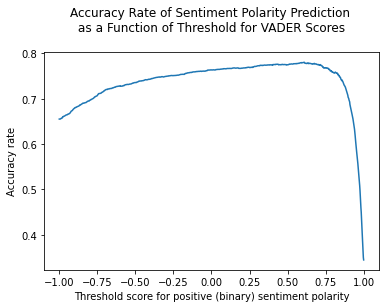

In [43]:
########## show the graph
thresholds = np.linspace(-1,1,1000)
acc_rates = [try_threshold_for_accuracy(VADER_polarity_test_df['VADER Score'],threshold) for threshold in thresholds]

plt.plot(thresholds, acc_rates)
plt.xlabel("Threshold score for positive (binary) sentiment polarity")
plt.ylabel("Accuracy rate")
plt.title("Accuracy Rate of Sentiment Polarity Prediction \n as a Function of Threshold for VADER Scores \n")
plt.show()

In [44]:
########## get the best tresholds
thresholds[acc_rates.index(max(acc_rates))]

0.6096096096096095

In [46]:
########## get the accuracy rate on the best tresholds
def analyze_sentiment_vader_lexicon_2(review, threshold = 0.6096, verbose = False):
    scores = analyzer.polarity_scores(review)  
    binary_sentiment = 'positive' if scores['compound'] >= threshold else 'negative'
    if verbose:                             
        print('VADER Polarity (Binary):', binary_sentiment)
        print('VADER Score:', round(scores['compound'], 2))
    return binary_sentiment,scores['compound'] 

In [47]:
###### check the test data polarity accuracy
VADER_polarity_test_2 = [analyze_sentiment_vader_lexicon_2(review, threshold=0.6096) for review in test_corpus]
VADER_polarity_test_df_2 = pd.DataFrame(VADER_polarity_test_2, columns = ['VADER Polarity','VADER Score'])
VADER_polarity_test_df_2.head()

,VADER Polarity,VADER Score
0,negative,0.4497
1,negative,-0.7488
2,positive,0.9132
3,negative,0.5455
4,positive,0.9881


In [48]:
from sklearn import metrics
print('Accuracy Rate:', np.round(metrics.accuracy_score(test_labels, 
                                 VADER_polarity_test_df_2['VADER Polarity']), 3),"\n")

Accuracy Rate: 0.78 



In [52]:
pd.crosstab(pd.Series(test_labels), 
            pd.Series(VADER_polarity_test_df['VADER Polarity']), 
            rownames = ['True:'], 
            colnames = ['Predicted:'], 
            margins = True)

Predicted:,negative,positive,All
True:,,,
negative,554,825,1379
positive,108,2513,2621
All,662,3338,4000


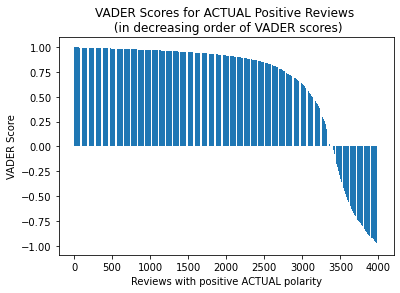

In [49]:
import matplotlib.pyplot as plt

pos_reviews_scored = VADER_polarity_test_df[:4000]['VADER Score']
plt.bar(range(0, 4000), pos_reviews_scored.sort_values(ascending=False))
plt.xlabel("Reviews with positive ACTUAL polarity")
plt.ylabel("VADER Score")
plt.title("VADER Scores for ACTUAL Positive Reviews \n (in decreasing order of VADER scores)")
plt.show()